In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Import packages for tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydot
#import graphviz
import seaborn as sns
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, LeakyReLU, BatchNormalization, Conv1D, MaxPooling1D, Activation
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import ModelCheckpoint
plt.style.use('fivethirtyeight')
plt.ioff()

In [4]:
tf_data = pandas.read_csv('Figures/Neural networks/RMSE_Tensorflow.csv', index_col=0, usecols=range(1,10))

In [5]:
tf_data

,Batch Size,Epochs,Model Name,Model alternative,Optimizer,Time steps,Uni/Multi,RMSE
Run,,,,,,,,
1,1,10,Model 1,1,adam,1,Univariate,37.942711
2,1,10,Model 2,1,adam,1,Multivariate,31.080595
3,1,40,Model 3,1,adam,1,Univariate,31.504920
4,1,40,Model 4,1,adam,1,Multivariate,27.286080
5,1,100,Model 5,1,adam,1,Univariate,33.270839
...,...,...,...,...,...,...,...,...
284,104,10,Model 284,1,nadam,104,Multivariate,24.205372
285,104,40,Model 285,1,nadam,104,Univariate,38.613904
286,104,40,Model 286,1,nadam,104,Multivariate,17.215180


In [19]:
tf_data.drop(["Model alternative"], axis=1).head(20).style.to_latex('Figures/Neural networks/RMSE_Tensorflow_head.tex', hrules=True)

In [7]:
tf_data.sort_values(by=['RMSE']).head(20)

,Batch Size,Epochs,Model Name,Model alternative,Optimizer,Time steps,Uni/Multi,RMSE
Run,,,,,,,,
186,26,100,Model 186,1,nadam,52,Multivariate,14.870351
72,2,100,Model 72,1,adam,104,Multivariate,16.107470
286,104,40,Model 286,1,nadam,104,Multivariate,17.215180
46,1,40,Model 46,1,nadam,104,Multivariate,17.250147
202,52,40,Model 202,1,adam,4,Multivariate,18.637282
124,13,40,Model 124,1,nadam,1,Multivariate,18.896268
130,13,40,Model 130,1,nadam,4,Multivariate,18.949729
52,2,40,Model 52,1,adam,1,Multivariate,19.147302
268,104,40,Model 268,1,nadam,1,Multivariate,19.438253


In [8]:
tf_data.columns

Index(['Batch Size', 'Epochs', 'Model Name', 'Model alternative', 'Optimizer',
       'Time steps', 'Uni/Multi', 'RMSE'],
      dtype='object')

In [9]:
df_Epochs = tf_data.groupby('Epochs').mean().loc[:,['RMSE']]
df_Batch_size = tf_data.groupby('Batch Size').mean().loc[:,['RMSE']]
df_Optimizer = tf_data.groupby('Optimizer').mean().loc[:,['RMSE']]
df_Time_steps = tf_data.groupby('Time steps').mean().loc[:,['RMSE']]
df_UniMulti = tf_data.groupby('Uni/Multi').mean().loc[:,['RMSE']]

/var/folders/xy/_0zst1c12b9_m_438bw49zw40000gn/T/ipykernel_79116/1717816527.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Epochs = tf_data.groupby('Epochs').mean().loc[:,['RMSE']]
/var/folders/xy/_0zst1c12b9_m_438bw49zw40000gn/T/ipykernel_79116/1717816527.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Batch_size = tf_data.groupby('Batch Size').mean().loc[:,['RMSE']]
/var/folders/xy/_0zst1c12b9_m_438bw49zw40000gn/T/ipykernel_79116/1717816527.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. 

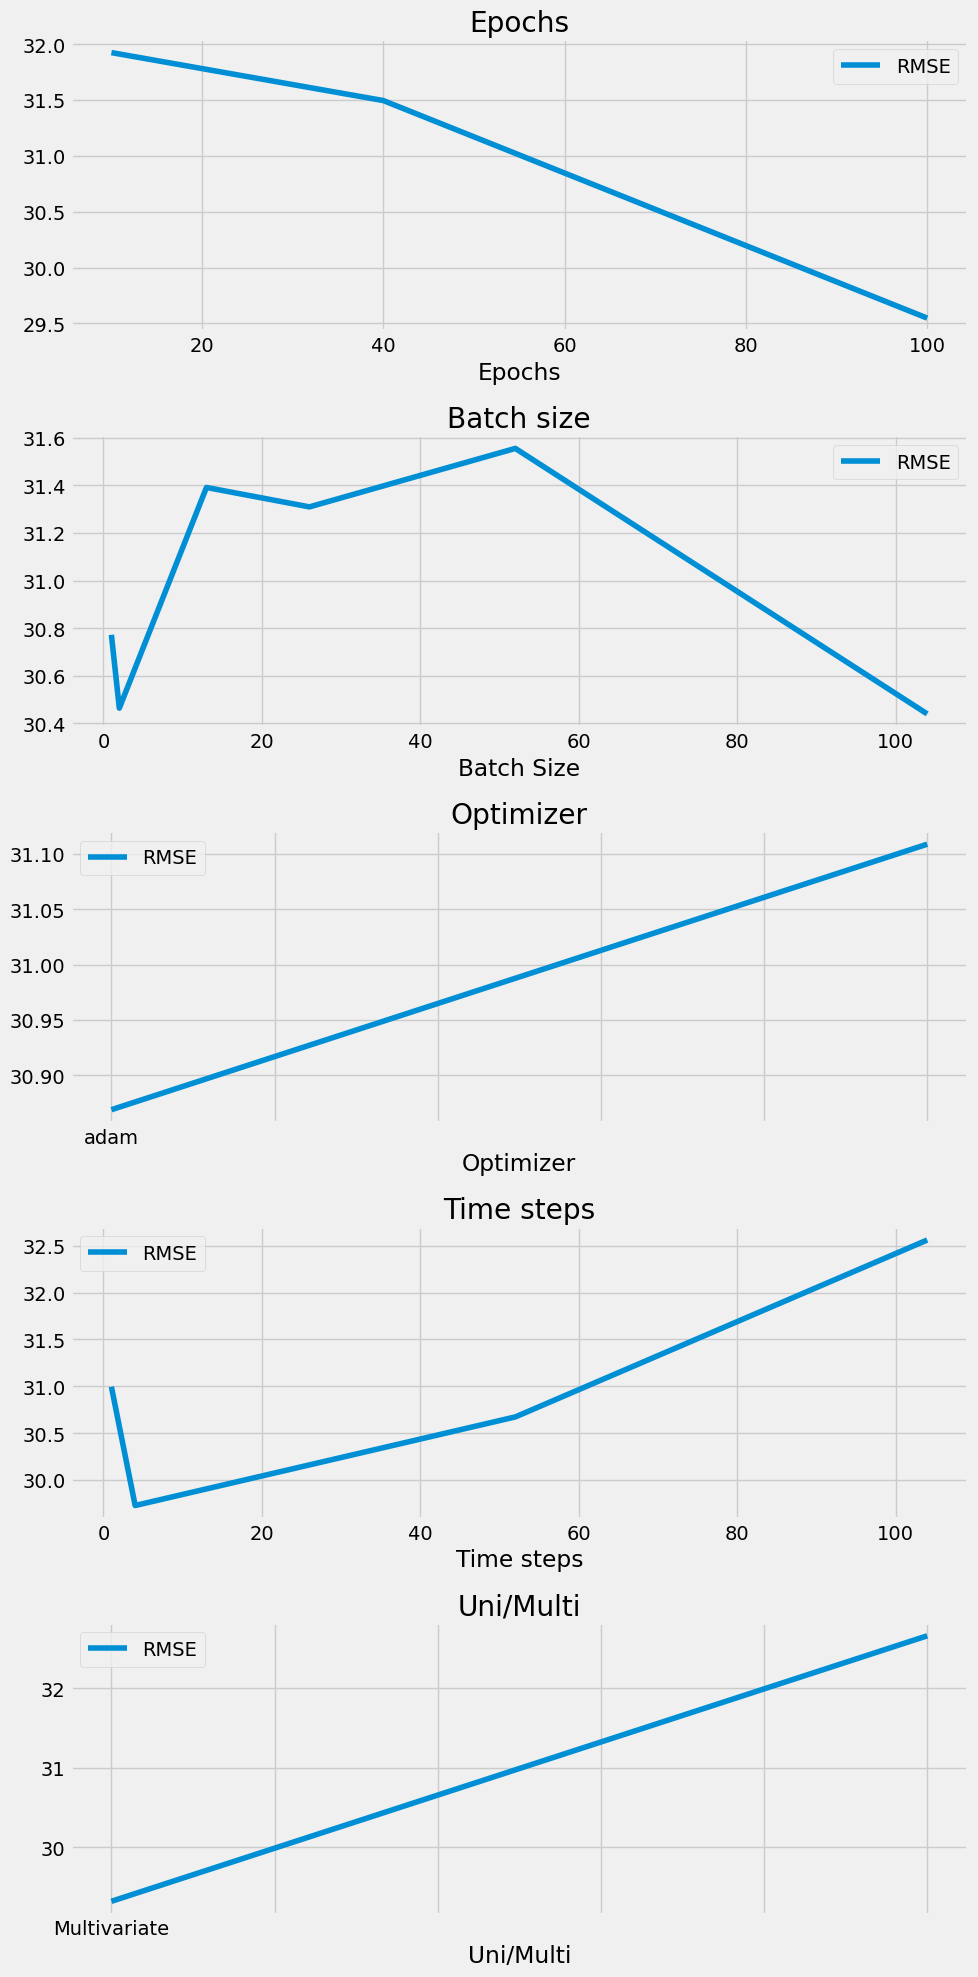

In [10]:
# Plot each dataframe by RMSE
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))
df_Epochs.plot(ax=axes[0], title='Epochs')
df_Batch_size.plot(ax=axes[1], title='Batch size')
df_Optimizer.plot(ax=axes[2], title='Optimizer')
df_Time_steps.plot(ax=axes[3], title='Time steps')
df_UniMulti.plot(ax=axes[4], title='Uni/Multi')
plt.tight_layout()
plt.show()

In [11]:

model_tf1 = Sequential()
model_tf1.add(Flatten(input_shape=(1,1)))
#m1 = m1 + 1
model_tf1.add(Dense(32, activation='relu'))
model_tf1.add(Dense(1))
model_tf1.compile(optimizer='nadam', loss='mse')


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-26 12:58:07.942389: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-26 12:58:07.942849: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model_tf1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


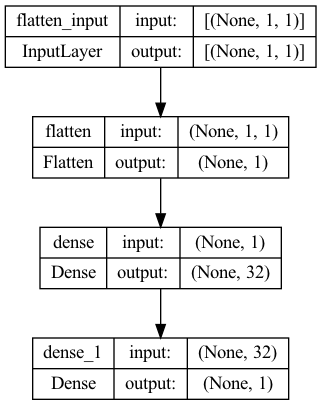

In [13]:
plot_model(model_tf1, show_shapes=True, show_layer_names=True, to_file='Figures/Neural networks/model_tf1.png')

In [14]:
df_Optimizer.style.to_latex('Figures/Neural networks/RMSE_Optimizer.tex')
df_Batch_size.style.to_latex('Figures/Neural networks/RMSE_Batch_size.tex')
df_Epochs.style.to_latex('Figures/Neural networks/RMSE_Epochs.tex')
df_Time_steps.style.to_latex('Figures/Neural networks/RMSE_Time_steps.tex')
df_UniMulti.style.to_latex('Figures/Neural networks/RMSE_UniMulti.tex')


In [15]:
tf_data.groupby('Optimizer').count()

,Batch Size,Epochs,Model Name,Model alternative,Time steps,Uni/Multi,RMSE
Optimizer,,,,,,,
adam,144,144,144,144,144,144,144
nadam,144,144,144,144,144,144,144


In [ ]:
tf_data.drop(["Model alternative"], axis=1).sort_values(by=['RMSE']).head(20).style.to_latex('Figures/Neural networks/RMSE_Tensorflow_top.tex', hrules=True)